In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = 'M:/{code}/CSRNet/CSRNet-pytorch/'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [49]:
model = CSRNet()

In [50]:
model = model.cuda()

In [68]:
checkpoint = torch.load('0checkpoint.pth.tar')

In [69]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [70]:
mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print(i,mae)
print(mae/len(img_paths))

0 95.12846374511719
1 385.96690368652344
2 1204.3836517333984
3 1237.4874114990234
4 1710.8412322998047
5 2202.8568267822266
6 2506.177444458008
7 2845.083724975586
8 3835.1380462646484
9 3893.302001953125
10 3922.7944946289062
11 4906.203796386719
12 5182.744110107422
13 5668.100250244141
14 5734.472518920898
15 5840.419845581055
16 6249.765121459961
17 6258.956268310547
18 6716.673431396484
19 7244.564178466797
20 7394.923156738281
21 7467.542694091797
22 7676.199005126953
23 7882.8992919921875
24 7925.162628173828
25 8627.303680419922
26 8913.642120361328
27 8980.763412475586
28 9403.908920288086
29 10488.870956420898
30 10491.352508544922
31 10964.39291381836
32 10993.532928466797
33 11136.415161132812
34 11211.715911865234
35 11308.662826538086
36 11745.421951293945
37 11805.672790527344
38 11867.7568359375
39 11998.70051574707
40 12156.146697998047
41 12427.632446289062
42 12680.329681396484
43 13117.37466430664
44 13776.939178466797
45 14314.280975341797
46 14430.626846313477
47

Predicted Count :  503


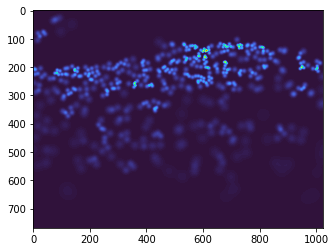

Original Count :  498
Original Image


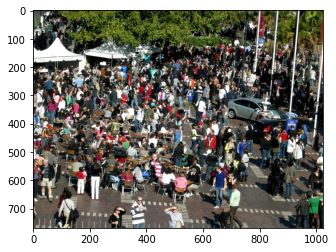

In [71]:
from matplotlib import cm as c
img = transform(Image.open('part_A_final/test_data/images/IMG_10.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",-20+int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.turbo)
# plt.show()
temp = h5py.File('part_A_final/test_data/ground_truth/IMG_10.h5', 'r')
temp_1 = np.asarray(temp['density'])
c=plt.imshow(temp_1,cmap = c.turbo)
plt.show()
print("Original Count : ",int(np.sum(temp_1)) + 1)

print("Original Image")
plt.imshow(plt.imread('part_A_final/test_data/images/IMG_10.jpg'))
plt.show()

Predicted Count :  391


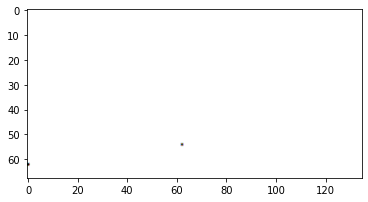

Original Image


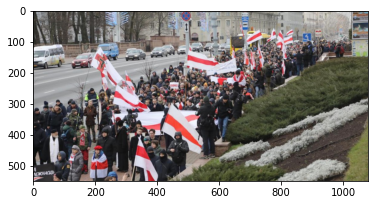

In [23]:
from matplotlib import cm as c
img = transform(Image.open('1.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.cubehelix)
plt.show()

print("Original Image")
plt.imshow(plt.imread('1.jpg'))
plt.show()

Predicted Count :  243


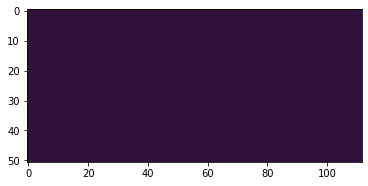

Original Count :  384


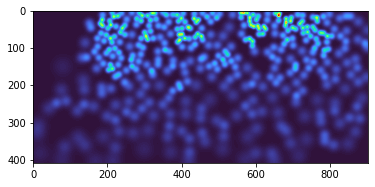

Original Image


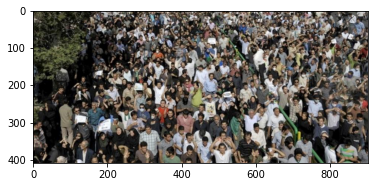

In [72]:
from matplotlib import cm as c
img = transform(Image.open('cutted_imag/a_final_test/IMG_100.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.turbo)
plt.show()
temp = h5py.File('part_A_final/test_data/ground_truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.turbo)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('cutted_imag/a_final_test/IMG_100.jpg'))
plt.show()

In [73]:
from tqdm import tqdm
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i])
                    .convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5')
                        .replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()
               - np.sum(groundtruth))
print (mae/len(img_paths))

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:04<00:00, 12.96it/s]

246.84211914627642
